In [4]:
#Anna Nagi
#zad1
from functools import reduce
from operator import mul
from sympy import symbols, lambdify
x = symbols('x')

def mnozenie(*args):
    return reduce(mul, *(list(args) + [1])) #tworzymy 1 wartosc

def pojedynczy_wielomian(x_array, i):
     def fragment_iloczynu(x_array, i):
          xi = x_array[i]
          for xj in x_array:
                if (xj == xi): # nie dzielimy przez 0
                     continue
                yield (x - xj) / (xi - xj)  #funkcja generujaca
     return mnozenie(fragment_iloczynu(x_array, i))  

def lagrange(x_args, y_args):
     suma = 0
     for i, yi in enumerate(y_args):
          do_sumy = yi * pojedynczy_wielomian(x_args, i)
          suma += do_sumy  
     return lambdify(x, suma)

x_array = [1,2,3]
y_array = [5,7,6]
func = lagrange(x_array, y_array)
print(func(1))


5.0


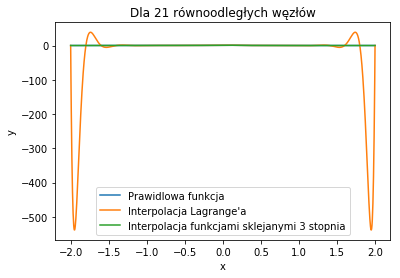

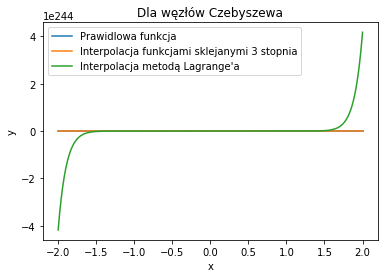

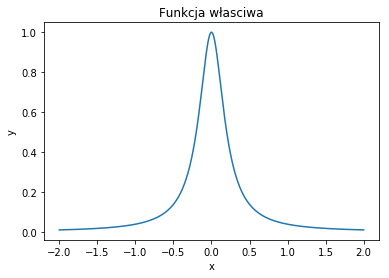

Interpolacja funkcjami sklejanymi 3. stopnia oferuje o wiele bardziej dokladne przyblizenie funkcji, niz interpolacja metodą Lagrange'a
Wezly Czebyszewa pozwalaja na dokladniejsze przyblizenie niz wezly rownoodlegle
Początkowo ze wzrostem liczby węzłów przybliżenie funckji jest coraz dokladniejsze, jednak po dalszym wzroście liczby wezlow, zaczyna się pogarszać.
Przy zbyt duzej ilosci wezlow wystepuje efekt Rungego, czyli  pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów
Jest to szczegolnie widoczne na krancach przedzialu funkcji


In [6]:
#zad 2
from numpy import linspace,array, sort
from math import cos, pi

from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

funkcja = lambda x_f: 1/(1 + (25*x_f**2))
x_array = linspace(-2, 2, 21)


#dla przedzialu [-2,2] = [a,b], 21 wezlow
a=-2
b=2
n=21
wezly_czebyszewa = lambda i: ((1/2)*(a+b) + (1/2)*(b-a)*cos(((2*i-1)/2*n)*pi))

x_czebyszew_array = []

for i in range(n):
    x_czebyszew_array.append(wezly_czebyszewa(i))

    
zbior_nieposortowany=array(list(set(x_czebyszew_array)))
zbior_cz=sort(zbior_nieposortowany)


x_dokladna = linspace(-2, 2, 1000)
y_dokladna = []
for i in x_dokladna:
    y_dokladna.append(funkcja(i))

#metoda lagrange'a
#dla 21 rownoleglych wezlow
lg=lagrange(x_array, funkcja(x_array))
cs = CubicSpline(x_array,funkcja(x_array),bc_type='natural')

y_wynik_lagrange = []
for i in x_dokladna:
    y_wynik_lagrange.append(lg(i))

y_wynik_sklejane3 =[]
for i in x_dokladna:
    y_wynik_sklejane3.append(cs(i))

plt.plot(x_dokladna, funkcja(x_dokladna))
plt.plot(x_dokladna, y_wynik_lagrange)
plt.plot(x_dokladna, y_wynik_sklejane3)


plt.legend(["Prawidlowa funkcja","Interpolacja Lagrange'a",
             "Interpolacja funkcjami sklejanymi 3 stopnia"])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dla 21 równoodległych węzłów")
plt.show()

lg_czebyszew=lagrange(zbior_cz, funkcja(zbior_cz))
cs_czebyszew=CubicSpline(zbior_cz,funkcja(zbior_cz),bc_type='natural')

y_wynik_lagrange_cz = []
for i in x_dokladna:
    y_wynik_lagrange_cz.append(lg_czebyszew(i))

y_wynik_sklejane3_cz =[]
for i in x_dokladna:
    y_wynik_sklejane3_cz.append(cs_czebyszew(i))
    
plt.plot(x_dokladna, funkcja(x_dokladna))
plt.plot(x_dokladna, y_wynik_sklejane3_cz)
plt.plot(x_dokladna, y_wynik_lagrange_cz)
plt.legend(["Prawidlowa funkcja",
             "Interpolacja funkcjami sklejanymi 3 stopnia", "Interpolacja metodą Lagrange'a"])
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dla węzłów Czebyszewa")
plt.show()


plt.plot(x_dokladna, funkcja(x_dokladna))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Funkcja własciwa")
plt.show()

print("Interpolacja funkcjami sklejanymi 3. stopnia oferuje o wiele bardziej dokladne przyblizenie funkcji, niz interpolacja metodą Lagrange'a")
print("Wezly Czebyszewa pozwalaja na dokladniejsze przyblizenie niz wezly rownoodlegle")
print("Początkowo ze wzrostem liczby węzłów przybliżenie funckji jest coraz dokladniejsze, jednak po dalszym wzroście liczby wezlow, zaczyna się pogarszać.")
print("Przy zbyt duzej ilosci wezlow wystepuje efekt Rungego, czyli  pogorszenie jakości interpolacji wielomianowej, mimo zwiększenia liczby jej węzłów")
print("Jest to szczegolnie widoczne na krancach przedzialu funkcji")


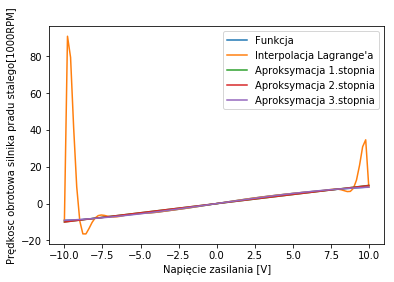

Interpolacja – metoda numeryczna polegająca na wyznaczaniu w danym przedziale tzw. funkcji interpolacyjnej, która przyjmuje w nim z góry zadane wartości, w ustalonych punktach nazywanych węzłami.
W metodzie interpolacji znane sa nam konkretne wartosci w wezlach, na ich podstawie wyznaczamy potrzebna funkcje.
Aproksymacja oznacza przybliżanie funkcji za pomocą prostszej, należącej do określonej klasy funkcji 
W przypadku aproksymacji wielomian aproksymacyjny nie musi przyjmowac wartosci funkcji aproksymowanej.
W przypadku interpolacji na krancach przedzialu widoczny jest efekt Rungego.
Wykresy aproksymacji funkcji lepiej odzwierciedlaja jej rzeczywisty przebieg od wykresow funkcji interpolujacej


In [7]:
#zad 3
from numpy import linspace, polyfit, poly1d
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

x_array=linspace(-10, 10, 21)
y_array = [-9.10, -8.82, -7.99, -7.10, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0.00, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.10, 7.81, 8.45, 9.02]

apr1 = polyfit(x_array, y_array, 1)
fapr1 = poly1d(apr1)

apr2 = polyfit(x_array, y_array, 2)
fapr2 = poly1d(apr2)

apr3 = polyfit(x_array, y_array, 3)
fapr3 = poly1d(apr3)

lg = lagrange(x_array, y_array)

x_dokladna = linspace(-10,10, 100)

plt.plot(x_array, y_array)
plt.plot(x_dokladna, lg(x_dokladna))
plt.plot(x_dokladna, fapr1(x_dokladna))
plt.plot(x_dokladna, fapr2(x_dokladna))
plt.plot(x_dokladna, fapr3(x_dokladna))



plt.legend(["Funkcja","Interpolacja Lagrange'a", "Aproksymacja 1.stopnia", "Aproksymacja 2.stopnia", "Aproksymacja 3.stopnia"])
    
plt.xlabel("Napięcie zasilania [V]")
plt.ylabel("Prędkosc obrotowa silnika pradu stalego[1000RPM]")
plt.show()

print("Interpolacja – metoda numeryczna polegająca na wyznaczaniu w danym przedziale tzw. funkcji interpolacyjnej, która przyjmuje w nim z góry zadane wartości, w ustalonych punktach nazywanych węzłami.")
print("W metodzie interpolacji znane sa nam konkretne wartosci w wezlach, na ich podstawie wyznaczamy potrzebna funkcje.")
print("Aproksymacja oznacza przybliżanie funkcji za pomocą prostszej, należącej do określonej klasy funkcji ")
print("W przypadku aproksymacji wielomian aproksymacyjny nie musi przyjmowac wartosci funkcji aproksymowanej.")
print("W przypadku interpolacji na krancach przedzialu widoczny jest efekt Rungego.")
print("Wykresy aproksymacji funkcji lepiej odzwierciedlaja jej rzeczywisty przebieg od wykresow funkcji interpolujacej")



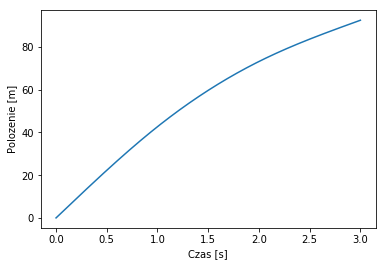

Polozenie =  2.27584694031 m
Predkosc =  22.3697080709 m/s


In [8]:
#zad4
from scipy.interpolate import CubicSpline, UnivariateSpline
from scipy.misc import derivative
import matplotlib.pyplot as plt
from numpy import linspace, array

x_array=[0.0, 1.0, 2.0, 3.0]
y_array=[0.0, 42.7, 73.2, 92.5]
cs = CubicSpline(x_array, y_array,bc_type='natural')

x_dokladna=linspace(0, 3, 10000)

plt.plot(x_dokladna, cs(x_dokladna))
plt.xlabel("Czas [s]")
plt.ylabel("Polozenie [m]")
plt.show()
funkcja = lambda i: 2*i

radar = 79.6
yreduced = array(y_array) - radar
freduced = UnivariateSpline(x_array, yreduced, s=0)
polozenie = freduced.roots()[0]
print("Polozenie = ",polozenie, "m")

predkosc = derivative(cs, polozenie)
print("Predkosc = ", predkosc, "m/s")